# Support Vector Machines (SVM)

1. Comentar sobre clasificación de imgs
2. Introducción de SVM
3. Ejemplos basados en puntos
4. Ejemplos basados en Imgs. 
5. Descripción Matemática

### Clasificación en Aprendizaje de Máquina

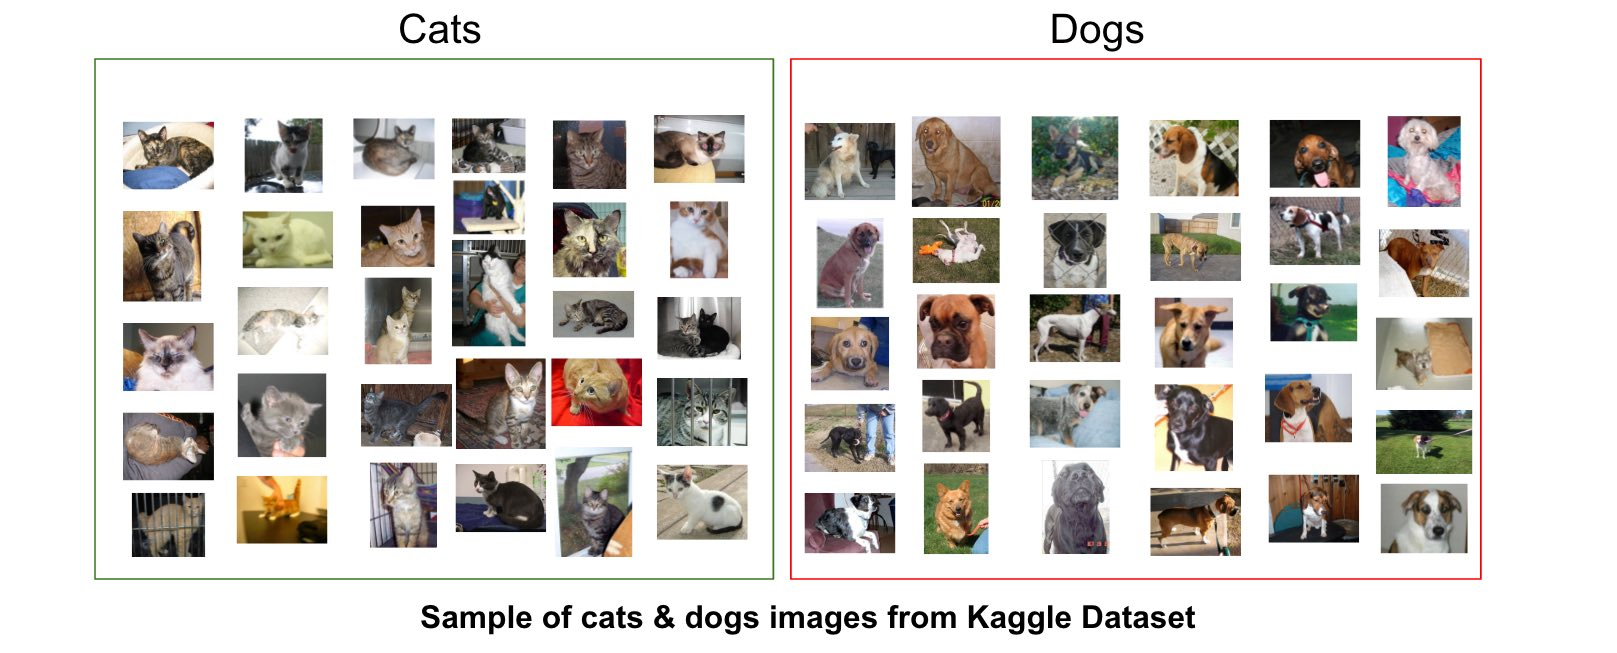

In [1]:
from IPython.display import Image
Image(filename='../imgs/cats-dogs.jpg', width=900)

Es un problema de **indentificar** un conjunto de categorias de pertenencia de una **nueva observación** dado un conjunto de **datos de entrenamiento** (categorias conocidas). 
- Se reciben datos (observaciones) para generar un modelo
- Los modelos pueden predecir caracteristicas de nuevos datos

### Las Máquinas de soporte vectorial (SVM)

Son una técnica de aprendizaje de máquina utilizado principalmente en problemas de clasificación. Queremos aprender un modelo que nos permita separar dos clases, representados como vectores. 

- Los ejemplos usados para construir las lineas de separación son llamados **vectores de soporte**. Los mas cercanos al hiperplano. 
- El objetivo es **maximizar** el margen del clasificador, descrito entre los **vectores de soporte**
- Ejemplo: 
    - H1 **No** separa las clases
    - H2 las separa con un pequeño margen
    - H3 las separa con el máximo margen
- **Margen**: Máxima distancia entre el hiperplano de separación

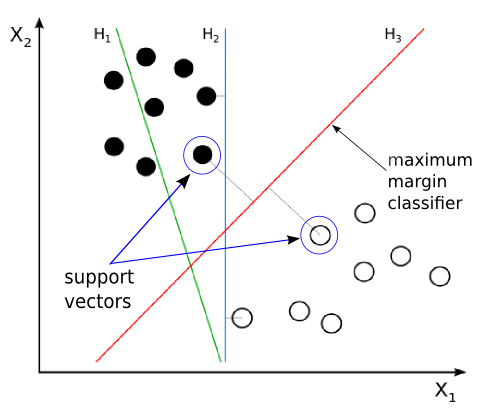

In [3]:
from IPython.display import Image
Image(filename='../imgs/svm_diagram.png', width=400)

### Margen y fronteras de decisión del (SVM)/ Margin adn decision boundary

Grandes margenes tienen tienden a tener baja generalización del error, mientras que pequeños margenes tienden a **sobreaprender**. 
- Los hiperplanos son paralelos a la frondera de decisión (decision boundary). Los hiperplanos son expresados como: 

$w_0 + w^{T}x_{\text{positive}} = 1 $
$w_0 + w^{T}x_{\text{negative}} = -1 $

Restando: 

$w^{T}(x_{\text{positive}} - x_{\text{negative}}) = 2 $

Si normalizamos con respecto a la suma: 

$w = \sum_{j=1}^{m} w_{j}^{2}$

Entonces podemos re-escribir: 

$\frac{w^{T}(x_{\text{positive}} - x_{\text{negative}})}{\parallel w \parallel} = \frac{2}{\parallel w \parallel} $

Esta es la distancia entre entre el hiperplano positivo y negativo. Esto representa el **margen** que se quiere **maximizar**

### Función Objetivo $\frac{2}{\parallel w \parallel}$

Se tiene que maximizar con la restricción que: todos los ejemplos negativos deben quedar del lado del hiperplano negativo e igualmente para las muestras positivas. Esto puede escribirse como: 

$w_0 + w^{T}x_i = \left\{\begin{matrix}
\geq 1  & \text{ if } y^{i} = 1\\ 
< -1 &  \text{ if } y^{i} = -1
\end{matrix}\right.$


#### Casos linealmente no separables

Se introduce $\xi$ que es la restricción lineal que se necesita relajar para hacer que los datos sean linealmente separables. permite que el problema de optimización converga con terminos mal clasificados

la variable debil $\xi$ puede introducirse en la función objetivo, como: 

$ w^{T}x_i = \left\{\begin{matrix}
\geq 1  & \text{ if } y^{i} = 1 - \xi\\ 
< -1 &  \text{ if } y^{i} = -1 + \xi
\end{matrix}\right.$


Por lo tanto la función a optimizar es: 

$\parallel w \parallel^{2} + C (\sum_{i} \xi^{i})$

$C$ es un valor que penaliza el error. Grandes valores de $C$ tiene menos tolerancia a falsas clasificaciones. 

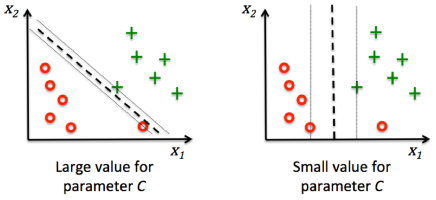

In [5]:
from IPython.display import Image
Image(filename='../imgs/bias-variance-trade-off-svm.png', width=500)

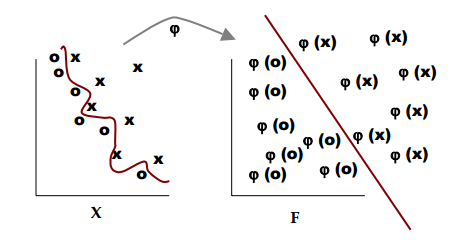

In [6]:
from IPython.display import Image
Image(filename='../imgs/KernelTrick.png', width=500)

### Ventajas y Limitaciones de SVM

- Son explicitos basados en un modelo de aprendizaje 
- Existen garantias teóricas sobre su comportamiento
- No son afectados por mínimos locales


### Algunos Ejemplos paso a paso en Python

Un ejemplo de partición utilizando un SVM lineal a partir de un conjunto de datos artificiales.
- Dependencias que se necesitan: 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

Se consideran conjuntos de muestra que tienen dos caracteristicas. Cada una de las caracteristicas se visualizan como: 

- Hacemos un arreglo con estas caracteristicas (vectores de dos dimensiones por cada muestra). 
- Hacemos un vector de la misma dimension que contiene las etiquetas, i.e., la pertenencia de cada clase. 

#### Iris Datset

Es un dataset clasico utilizado en problemas de clasificación apra ilustrar el comportamiento de diferentes metodos de aprendizaje de máquina. Contiene  Este dataset tipos de planta que requieren ser categorizadas sugún ciertas caracteristicas. contiene: 

- Classes	3
- Samples per class	50
- Samples total	150
- Dimensionality	4
- Features	real, positive

Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems
http://archive.ics.uci.edu/ml/datasets/Iris

Algunos atributos son: 

- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

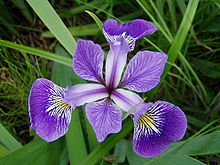

In [8]:
from IPython.display import Image
Image(filename='../imgs/220px-Iris_versicolor_3.jpg', width=300)


/opt/miniconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


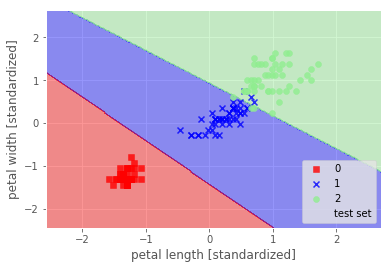

In [9]:
#=====================  Ejemplo del clasificador ==============================

from sklearn import datasets
import numpy as np

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

# Decision region drawing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='lower right')
plt.show()





Descripción matematica
-ejemplo basado en puntos
-ejemplo otro

### Kernels utilizados en SVM

1. Linealmente separables. Se utilizan esquemas basados en lineas de corte. Método es eficiente y computacionalmente tratable para grandes dimensiones de datos. 
2. Truco basado en kernel. Se pasa a una dimensión superior donde se peuden separar. lineal, polinómico y RBF, 

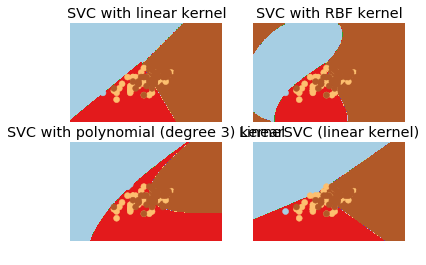

In [11]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']


for i, clf in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    pl.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.contourf(xx, yy, Z, cmap=pl.cm.Paired)
    pl.axis('off')

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

    pl.title(titles[i])

pl.show()